In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# Read data and make a dataframe
ds_salaries_df = pd.read_csv("Resources/ds_salaries.csv")
del ds_salaries_df["Unnamed: 0"]

ds_renamed_df = ds_salaries_df.rename(columns={"work_year":"Work Year",
                                              "experience_level":"Experience Level",
                                              "employment_type":"Employment Type",
                                              "job_title":"Job Title",
                                              "salary":"Salary",
                                              "salary_currency":"Salary Currency",
                                              "salary_in_usd": "Salary in USD",
                                              "employee_residence":"Employee Residence",
                                              "remote_ratio":"Remote Ratio",
                                              "company_location":"Company Location",
                                              "company_size":"Company Size"})

ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [12]:
# Since there are too many job title, we choose the popular job title to research, the top10 is the popular level
# If change top10, the pie chart and the bar chart will change automatic
top10=14

ds_top_df=ds_renamed_df.copy()
series_top=ds_renamed_df["Job Title"].value_counts().head(top10).keys()

list_top=[]
for i in series_top:
    list_top.append(i)

# Other job title
for index, row in ds_renamed_df.iterrows():
    if row[3] not in list_top:
        ds_top_df.loc[index,'Job Title']='Others'

In [13]:
ds_top_df['Job Title'].value_counts()

Data Scientist                143
Data Engineer                 132
Others                        104
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Data Science Consultant         7
Director of Data Science        7
AI Scientist                    7
Principal Data Scientist        7
Data Analytics Manager          7
Name: Job Title, dtype: int64

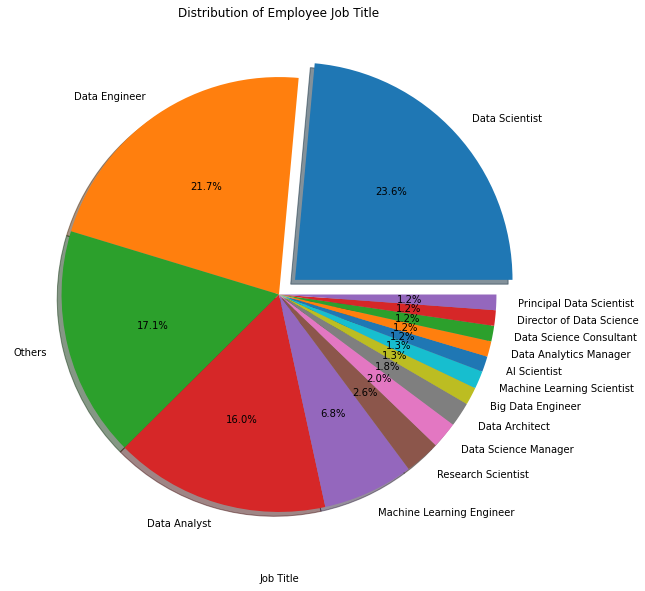

In [20]:
# Job title Distribution by pie chart
job_title = ds_top_df.groupby('Job Title')
count_job_title=job_title['Job Title'].count().sort_values(ascending=False)

explode_list=[]
for i in range(top10+1):
    if i == 0 :
        explode_list.append(0.1)
    else:
        explode_list.append(0)

plt.figure(figsize=(10,10))

plt.pie(count_job_title, labels=count_job_title.index,  explode=explode_list,autopct='%1.1f%%', startangle=0, shadow=True)
plt.xlabel("Job Title")
plt.title("Distribution of Employee Job Title")
plt.show() 

In [15]:
ds_top_df_bar=ds_top_df.loc[ds_top_df['Job Title']!='Others']

job_title = ds_top_df_bar.groupby(["Job Title"])

salary_mean = job_title["Salary in USD"].mean()
salary_median = job_title["Salary in USD"].median()
salary_var = job_title["Salary in USD"].var()
salary_std = job_title["Salary in USD"].std()
salary_count = job_title["Salary in USD"].count()

In [16]:
salary_job_title_summary_df = pd.DataFrame({"Mean": salary_mean,
                         "Median": salary_median,
                         "Variance": salary_var,
                         "Std Deviation": salary_std,
                         "Count":salary_count
                          })


In [17]:
bar_df=salary_job_title_summary_df.sort_values('Mean',ascending=False).copy()
bar_df.reset_index(inplace=True)
bar_df

,Job Title,Mean,Median,Variance,Std Deviation,Count
0,Principal Data Scientist,215242.428571,173762.0,8.969044e+09,94705.038268,7
1,Director of Data Science,195074.000000,168000.0,4.902211e+09,70015.787970,7
2,Data Architect,177873.909091,180000.0,2.089836e+09,45714.721424,11
3,Machine Learning Scientist,158412.500000,156500.0,6.322590e+09,79514.714496,8
4,Data Science Manager,158328.500000,155750.0,2.765622e+09,52589.180497,12
5,Data Analytics Manager,127134.285714,120000.0,3.187433e+08,17853.383299,7
6,Data Engineer,112725.000000,105500.0,3.321111e+09,57629.082107,132
7,Research Scientist,109019.500000,76263.5,9.710676e+09,98542.763968,16
8,Data Scientist,108187.832168,103691.0,4.110456e+09,64112.840519,143
9,Machine Learning Engineer,104880.146341,87932.0,3.996595e+09,63218.626439,41


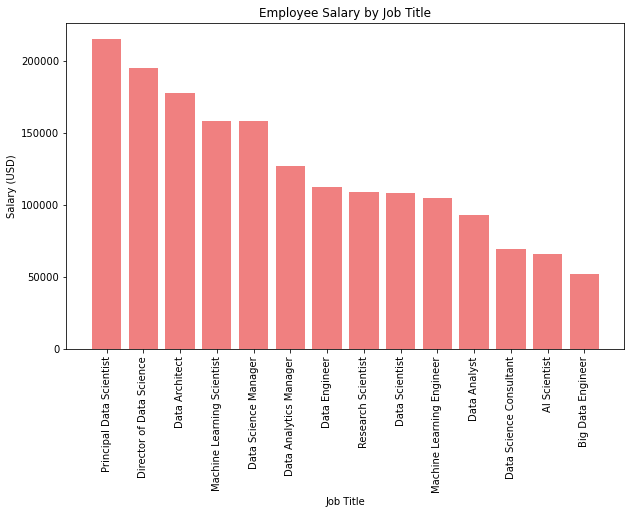

In [19]:
# Job title salary by bar chart
plt.figure(figsize=(10,6))

x_axis=np.arange(len(bar_df['Job Title']))
tick_locations=[value+0 for value in x_axis]

plt.bar(x_axis,bar_df['Mean'],color='lightcoral')
plt.title('Employee Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(tick_locations,labels=bar_df['Job Title'], rotation=90)
plt.show()

# Highest Salary
The highest salary of job title which sample size more than 6 is ___'Principal Data Scientist'___. USD 215242 is average salary of 7 person.